In [0]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [0]:
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

In [16]:
# local dos dados e modifica o diretorio
!git clone https://github.com/ucfilho/ANN
% cd ANN
! ls

fatal: destination path 'ANN' already exists and is not an empty directory.
/content/ANN/ANN
ANN
ann_aula_ago_14_2018_leitura_git.ipynb
ANN_aula_Scikit_learn _ago_29_2018.ipynb
ANN_Hydrofoil_ago_29_2018.txt.ipynb
ANN_Hydrofoil_Clean_02_set_12_2018.ipynb
ANN_Hydrofoil_Neuronicos_02__set_12_2018.ipynb
ANN_Hydrofoil_Neuronio_set_17_2018.ipynb
ANN_Hydrofoil_set_05_2018.ipynb
ANN_Hydrofoil_set_12_2018.ipynb
Aprendendo_Um_Pouco_mais_sobre_Python_set_05_2018.ipynb
arvore.jpg
Aula_003_Python_audio_e_imagem_ago_29_2018.ipynb
aula_04_rede_neural_set_05_2018.pdf
BBC_007041008.wav
Constroi_ANN_set_19_2018.ipynb
Criando_Gethub_Ver_Youtube.txt
FAULT_DIAGNOSIS_maio_25_2017.txt
Hydrofoil_ago_29_2018.csv
john_mccarthy.png
Paper_Carvao_China_abril_12_2016.csv
Paper_Carvao_China_mar_31_2016.txt
README.md
simbolos.pdf
Video_mp4_Python_Notebook.ipynb


In [0]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

# normatize funcion
def Normatiza(x):
    strings=list(x)
    for featur in strings:
        max_feat=x[featur].max()
        min_feat=x[featur].min()
        x[featur]=(x[featur]-min_feat)/(max_feat-min_feat)
    return x

# normatize funcion
def Original(x,x_old):
    strings=list(x)
    x_old.columns = list(x)
    for featur in strings:
        max_feat=x_old[featur].max()
        min_feat=x_old[featur].min()
        x[featur]=x[featur]*(max_feat-min_feat)+min_feat
    return x


In [0]:

# leitura dos dados
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")

# separa as colunas de interesse
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
Y_old=Dat_Select['Resistence'].copy()
#print(Dat_Select.head())

# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)
#print(DAT.head())

# separa os dados em treino e teste
train=[]
test=[]
train=DAT.sample(frac=0.8,random_state=None).copy() # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index).copy()
X_train=train.loc[DAT['Hydrofoil']==DAT['Hydrofoil'],['Hydrofoil','Froude']].values
X_test=test.loc[DAT['Hydrofoil']==DAT['Hydrofoil'],['Hydrofoil','Froude']].values
Y_test=train.loc[DAT['Hydrofoil']==DAT['Hydrofoil'],['Resistence']].values
Y_train=train.loc[DAT['Hydrofoil']==DAT['Hydrofoil'],['Resistence']].values



In [0]:
# Parametros da rede neural
Neuron_input=2
Neuron_hidden=20
Neuron_output=1
Learning_rate=0.01
omega=0.9
Epoch=50000  

Epoch 0 error:1.4567182124828701
Epoch 5000 error:0.037126540491794736
Epoch 10000 error:0.03713916742365409
Epoch 15000 error:0.037091596077966985
Epoch 20000 error:0.037040453908175654
Epoch 25000 error:0.03699175202590713
Epoch 30000 error:0.03694383473976724
Epoch 35000 error:0.0368944067379506
Epoch 40000 error:0.036841494230742726
Epoch 45000 error:0.03678339547104289
Epoch 50000 error:0.03671849697433145
Epoch 55000 error:0.036645110818642856
Epoch 60000 error:0.0365613568914143
Epoch 65000 error:0.03646509679265329
Epoch 70000 error:0.03635393409651277
Epoch 75000 error:0.03622538423280262
Epoch 80000 error:0.0361000144818945
Epoch 85000 error:0.0359548894074288
Epoch 90000 error:0.03578832887387521
Epoch 95000 error:0.03559952728200454
Epoch 100000 error:0.03538875305020504
Epoch 105000 error:0.035160580994501124
Epoch 110000 error:0.034916959219561915
Epoch 115000 error:0.03465911055181458
Epoch 120000 error:0.0343894593643369
Epoch 125000 error:0.0341102802221854
Epoch 13000

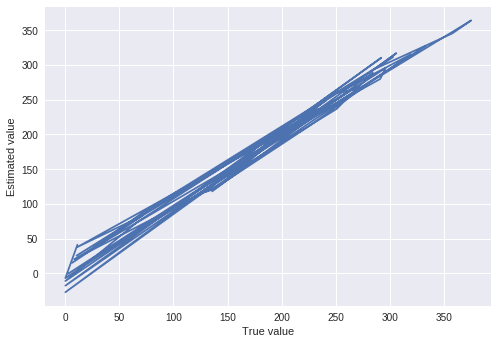

In [20]:
# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1
syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1

for j in range(Epoch):

    # Feed forward through layers 0, 1, and 2
    l0 = X_train
    l1 = sigmoid(np.dot(l0,syn0))
    l2 = purelin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = Y_train - l2

    if (j% 5000) == 0:
        print("Epoch %d"%(j) +" error:" + str(np.mean(np.abs(l2_error))))

    l2_delta = l2_error*purelin(l2,deriv=True) #metodo do gradiente descendente --- direcao de correcao
    l1_error = l2_delta.dot(syn1.T) # utiliza a matriz transposta
    l1_delta = l1_error * sigmoid(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)*Learning_rate
    syn0 += l0.T.dot(l1_delta)*Learning_rate

Y_test=pd.DataFrame(Y_test)
Y_test.columns = ["y_test"]
y_calc=np.reshape(l2,len(l2))
y_calc=pd.DataFrame({'y_calc':y_calc})
y_old=pd.DataFrame({'y_old':Y_old})
y_calc=Original(y_calc,y_old)
y_obs=Original(Y_test,y_old)

#plt.scatter(y_obs,y_calc, s=10, c='b', marker="s")
plt.plot(y_obs,y_calc)
plt.xlabel("True value")
plt.ylabel("Estimated value")
plt.show()

In [21]:
mse=mean_squared_error(y_obs,y_calc)
print("MSE teste=",mse)
R2=r2_score(y_obs,y_calc)
print("R^2 teste=",R2)

MSE teste= 141.1516331833778
R^2 teste= 0.9888127024682993
